In [1]:
# imports
import torch
from torch.distributions import Normal,Uniform
import sys
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path = Path.cwd().parents[1]
if str(path) not in sys.path:
    sys.path.append(str(path))

from src.kernels import NuclearKernel,GammaExponentialKernel,GaussianKernel

class MON:

    def __init__(self, mean, scale):
        self.mean = mean
        self.scale = scale

    def sample(self, size):

        K = len(self.mean)
        N = size[0]

        eps = Normal(0,self.scale).sample(size)
        b = torch.randint(K,(N,))
        return (self.mean[b]+eps).reshape(len(eps),1)       

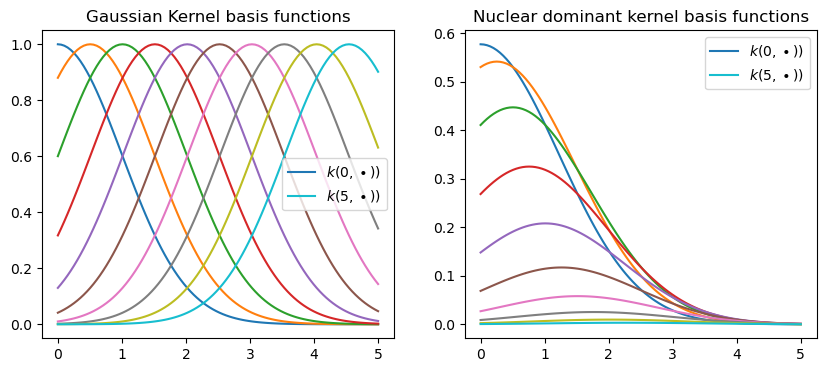

In [62]:
kernel = NuclearKernel(GammaExponentialKernel(torch.ones(1),torch.ones(1), 0),
                       Normal(torch.zeros(1),1.0*torch.ones(1)),
                       100000)
kernel2 = GammaExponentialKernel(torch.ones(1),torch.ones(1), 0)
X = torch.linspace(0,5,100)[:,None]
K = kernel.get_gram_gaussian(X=X,Z=X)
K2 = kernel2.get_gram(X=X,Z=X)

ngrid = 10
fig,axs = plt.subplots(1,2, figsize = (10,4))
for i in range(ngrid):
    if i == 0 or i == ngrid-1:
        axs[1].plot(X,K[:,int(100/ngrid)*i], label = r"$k({0},\bullet))$".format(0+5*(i==ngrid-1)))
        axs[0].plot(X,K2[:,int(100/ngrid)*i], label = r"$k({0},\bullet))$".format(0+5*(i==ngrid-1)))
    else:
        axs[1].plot(X,K[:,int(100/ngrid)*i])
        axs[0].plot(X,K2[:,int(100/ngrid)*i])
axs[1].set_title("Nuclear dominant kernel basis functions")
axs[0].set_title("Gaussian Kernel basis functions")
axs[0].legend()
axs[1].legend()
fig.savefig("nonstationary_basis_functions", bbox_inches = "tight")

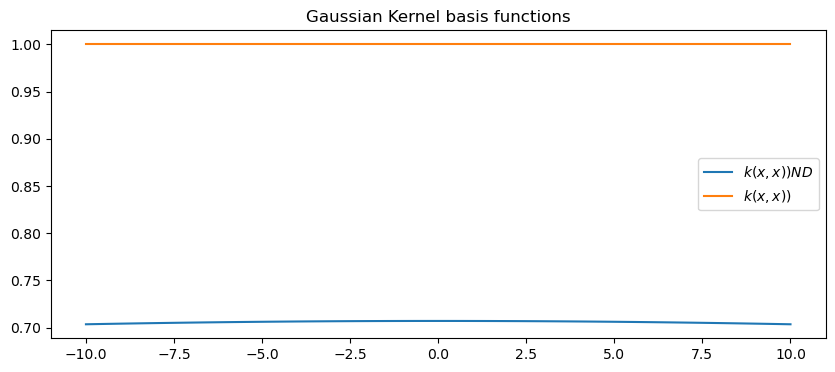

In [34]:
kernel = NuclearKernel(GaussianKernel(torch.ones(1),torch.ones(1)),
                       Normal(torch.zeros(1),100.0*torch.ones(1)),
                       100000)
kernel2 = GaussianKernel(torch.ones(1),torch.ones(1))
X = torch.linspace(-10,10,100)[:,None]
K = kernel.get_gram_gaussian(X=X,Z=X)
K2 = kernel2.get_gram(X=X,Z=X)

ngrid = 10
fig,axs = plt.subplots(figsize = (10,4))
axs.plot(X,100*K.diag(), label = r"$k(x,x)) ND$".format(-1 + 2*(i!=0)))
axs.plot(X,K2.diag(), label = r"$k(x,x))$".format(-1+2*(i!=0)))
axs.set_title("Nuclear dominant kernel basis functions")
axs.set_title("Gaussian Kernel basis functions")
axs.legend()
fig.savefig("nonstationary_basis_functions", bbox_inches = "tight")

tensor([[1.0000, 0.9998, 0.9992,  ..., 0.1466, 0.1409, 0.1353],
        [0.9998, 1.0000, 0.9998,  ..., 0.1525, 0.1466, 0.1409],
        [0.9992, 0.9998, 1.0000,  ..., 0.1586, 0.1525, 0.1466],
        ...,
        [0.1466, 0.1525, 0.1586,  ..., 1.0000, 0.9998, 0.9992],
        [0.1409, 0.1466, 0.1525,  ..., 0.9998, 1.0000, 0.9998],
        [0.1353, 0.1409, 0.1466,  ..., 0.9992, 0.9998, 1.0000]])


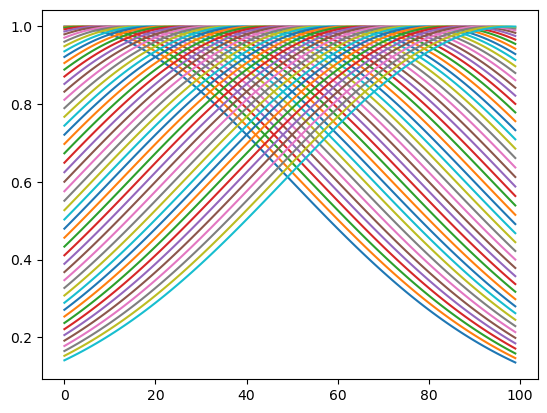

In [33]:
ngrid = 50
for i in range(ngrid):
    plt.plot(K[:,int(100/ngrid)*i])

In [36]:
n = 1000
m = 10000
eigenvals = torch.exp(-torch.linspace(1,n,n))
#eigenvals = 1/torch.linspace(1,n,n)**2
A = Normal(0,1).sample((n,n))
C = A @ A.T + torch.eye(n)

f = MultivariateNormal(torch.zeros(n),C).sample((m,)) * eigenvals
z = Normal(0,1).sample((m,n))

X = (z @ f.T).diag()

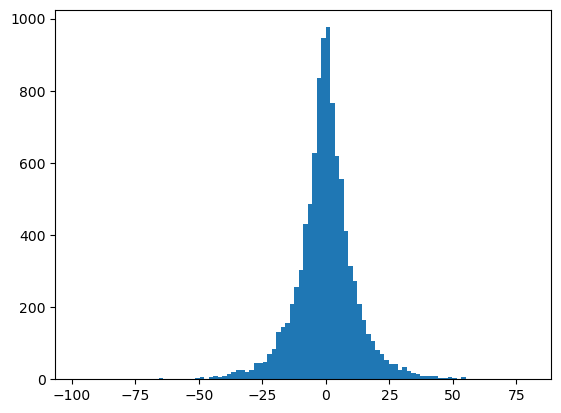

In [37]:
plt.hist(X, bins = 100);